# Regresija

Opazujemo, kako sta dve slučajni spremenljivki $X$ in $Y$ povezani.

## Regresijski premici
Odvisnost $X$ in $Y$ opišemo z regresijskimi premicami
$$Y = b_1X + a_1$$
in 
$$X = b_2Y + a_2$$
Parametra $b_1$ in $a_1$ lahko izrazimo s korelacijskim koeficientom in standardnim odklonom
$$b_1 = \frac{K(X,Y)}{\sigma_X^2}$$
in 
$$a_1 = E(Y)- b_1 E(X).$$
### Ocena za koeficiente regresijske premice na podlagi vzorca

Definiramo naslednje količine
$$C(X,Y) = \sum (x_i-\bar{x})(y_i - \bar{y})$$
in 
$$C(X)^2 = C(X,X)= \sum (x_i-\bar{x})^2$$
Potem lahko **ocene** za parametre $b_1$ in $a_1$ izrazimo kot
$$\hat{b}_1 = \frac{C(X,Y)}{C(X)^2}$$
in 
$$\hat{a}_1 = \bar{y} - \hat{b}_1\bar{x}$$ 

In [4]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
x = [1, 2, 3, 4, 5]
y = [2, 6, 7, 10, 10] 

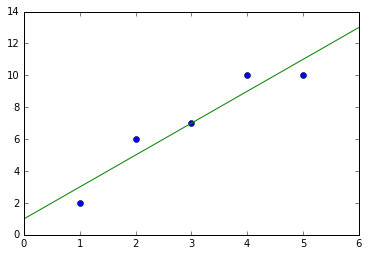

In [7]:
plot(x, y, 'o')
plot([0, 6], [1, 13])

In [9]:
print("Napoved za Y pri X=10 je enaka vrednosti {}".format(2*10+1))

Napoved za Y pri X=10 je enaka vrednosti 21


# Zveza med telesno višino in telesno težo


In [15]:
v = array([188, 190, 180, 194, 180, 172, 173, 172, 183, 180, 175])
t = array([108, 90, 95, 83, 73, 80, 60, 57, 66, 80, 70])

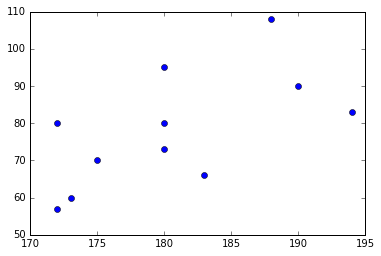

In [12]:
plot(v, t, 'o')

In [13]:
vp = sum(v)/len(v)
vp

180.63636363636363

In [14]:
tp = mean(t)
tp

78.36363636363636

In [20]:
CX2 = sum((v-vp)**2)
CXY = sum((v-vp)*(t-tp))
b = CXY/CX2

In [21]:
b

1.252246469833119

In [23]:
a = tp -b*vp
a

-147.83761232349161

In [24]:
# Napoved teže za višino 210cm

In [25]:
b*210+a

115.13414634146341

In [26]:
b*160+a

52.52182284980745

In [29]:
(t-(b*v+a))

array([ 20.41527599,  -0.08921694,  17.43324775, -12.09820282,
        -4.56675225,  12.45121951,  -8.80102696, -10.54878049,
       -15.32349166,   2.43324775,  -1.3055199 ])

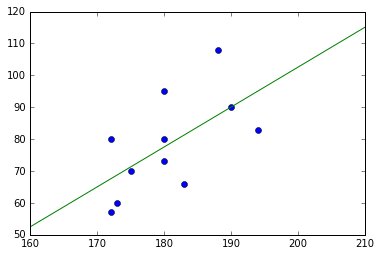

In [30]:
v0 = array([160, 210])
plot(v, t, 'o')
plot(v0, b*v0+a)